<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP5/TP5_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from chart_studio import plotly
from __future__ import division
from math import *
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import matplotlib.pyplot as plt
import plotly.plotly as py

In [ ]:
def BM(dt):
    T = np.arange(0,1+dt,dt)
    n = len(T)
    B = np.ones(n)*0
    for i in range(n):
        xi = sqrt(2)*(np.random.randn())/((i+0.5)*pi)
        B = B + xi*np.array([sin((i+0.5)*pi*t) for t in T])
    return T, B


In [ ]:
W = []
DAT = []
for k in range(8):
    X, Y = BM(0.001)
    W.append(Y)
    DAT.append(go.Scatter(x=X, y=Y,  line = dict(color = '#ff{}000'.format(k)),name="B{}".format(k)))    

Layout=go.Layout(title='Movimiento Browniano $B_t(\omega)$')
fig = go.Figure(data=DAT, layout=Layout)
plotly.plot(fig,filename='MBM')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plotly.com/api_signup

Questions? accounts@plotly.com


''

###Generar ruido blanco

In [251]:
import numpy as np
import matplotlib.pyplot as plt
#@title Seleccione la escala { run: "auto" }
escala_x = 150 #@param {type:"slider", min:0, max:1000, step:10}
escala_y = 0.6 #@param {type:"slider", min:0, max:10, step:0.1}
samples = np.random.randn(0, 1, size=[escala_x,1])
plt.figure(figsize=(10, 5))
plt.title("White noise", fontsize = 15)
plt.plot(escala_y*samples)
plt.xlabel("Frecuency (Hz)")
plt.ylabel("Potencia")

TypeError: ignored

Text(0, 0.5, 'Potencia')

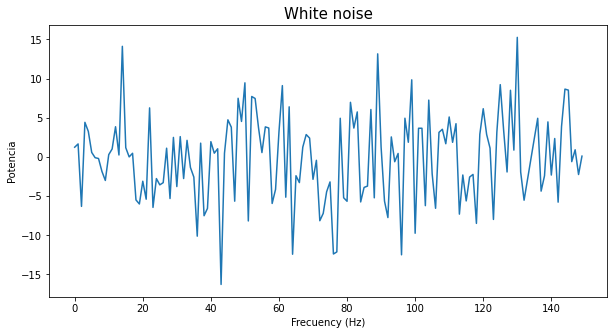

In [ ]:
#@title Seleccione la escala { run: "auto" }
escala_xx = 5.6 #@param {type:"slider", min:0, max:10, step:0.1}
newarr = np.multiply(samples, escala_xx)
plt.figure(figsize=(10, 5))
plt.title("White noise", fontsize = 15)
plt.plot(newarr)
plt.xlabel("Frecuency (Hz)")
plt.ylabel("Potencia")

In [ ]:
pip install whitenoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---------------------

In [219]:
# Load the Python libraries
import numpy as np
from collections import Counter
from numpy import complex, array
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import colorsys

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [220]:
# This function gets a random number from a uniform distribution between the two input values [min_value, max_value] inclusively
def get_random_number(min_value, max_value):
    range = max_value - min_value
    num = np.random.uniform(0, 1)
    return min_value + range * num

In [221]:
# Function that creates a series of numbers using chaos theory
def get_chaos_list(seed, n):
    numList = []
    k = 3.9976543219876543210
    x = seed
    
    for i in range(n):
        x = x * k * (1 - x)
        numList += [x]
    
    # Return x and y
    return np.arange(len(numList)), numList

In [222]:
# Function that plot a (x, y) series of points
def plot_line_chart(x, y, x_label, y_label, title):
    plt.figure(figsize = (16, 4))
    plt.plot(x, y, label = y_label)
    plt.xlabel(x_label, fontsize = 11)
    plt.ylabel(y_label, fontsize = 11)
    plt.title(title, size=14)
    plt.legend(loc = 'upper right')
    plt.show()

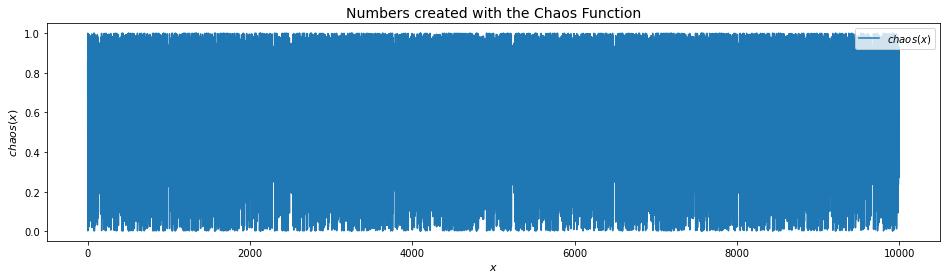

In [223]:
# Create and plot 100 random-chaos numbers
seed = get_random_number(0, 1)
x, y = get_chaos_list(seed, 10000)
plot_line_chart(x, y, '$x$', '$chaos(x)$', 'Numbers created with the Chaos Function')

(-1.0, 20.0)

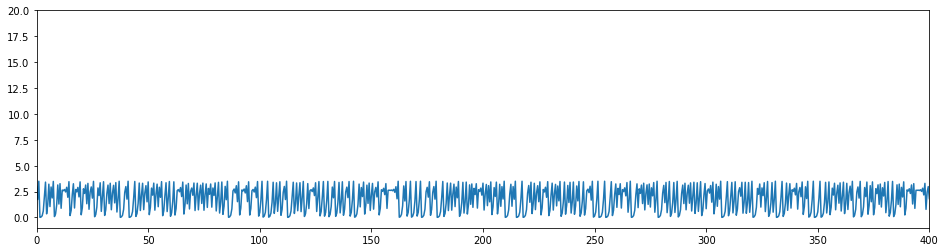

In [250]:
#@title Seleccione la escala { run: "auto" }
escala_xx = 0.5 #@param {type:"slider", min:0, max:20, step:0.5}
escala_yy = 3.5 #@param {type:"slider", min:0, max:20, step:0.5}
newarr = np.multiply(y, escala_yy)
newarr2 = np.multiply(x, escala_xx)
fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(newarr2,newarr)
ax.set_xlim(left=-0, right=400)
ax.set_ylim(-1,20)

In [ ]:
fig, ax = plt.subplots()
ax.plot(newarr2,newarr)
ax.set_xlim(left=-0, right=100)
ax.set_ylim(-4,4)

Text(0, 0.5, 'Potencia')

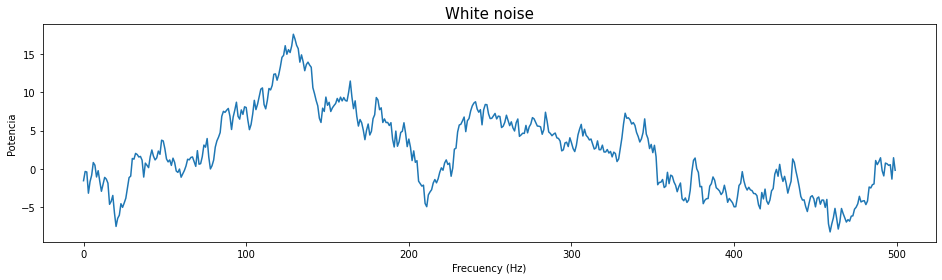

In [367]:
import numpy as np
import matplotlib.pyplot as plt
samples = np.random.randn(500).cumsum()
plt.figure(figsize=(16, 4))
plt.title("White noise", fontsize = 15)
plt.plot(samples)
plt.xlabel("Frecuency (Hz)")
plt.ylabel("Potencia")

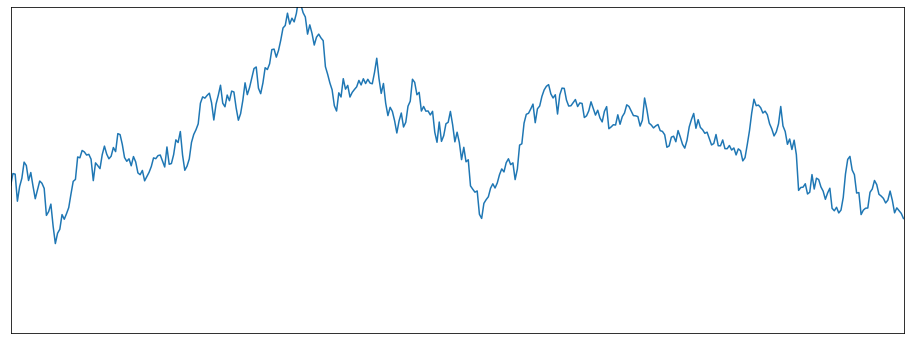

In [515]:
#@title Seleccione la escala { run: "auto" }
escala_x = 1 #@param {type:"slider", min:1, max:20, step:0.5}
escala_y = 1 #@param {type:"slider", min:1, max:20, step:0.5}
samples2 = np.arange(len(samples))
escala_x = np.sqrt(escala_x)
newarr = np.multiply(samples, escala_y)
newarr2 = np.multiply(samples2, escala_x)
fig, ax = plt.subplots(figsize = (16, 6))
ax.plot(newarr2,newarr)
ax.set_xlim(left=-0, right=400)
ax.set_ylim(-100,100)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)